### 1. import and install Dependencies
### 2.Keypoints using MedialPipiline Holistic
### 3.Extract keypoint values
### 4.Setup folders for collection
### 5.collect keypoint values for training and testing
### 6.preprocess Data and create labels and features
### 7.build and train LSTM Neural Network
### 8.Make Predictions
### 9.Save wights
### 10.evalution using onfusion metrix and accuracy
### 11.Test in Real Time


### 1. import and install Dependencies

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

### 2.Keypoints using MedialPipiline Holistic

In [5]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Draeing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #COLOR Conversion BGR 2 RGB
    image.flags.writeable = False                  #Image is no longer writeable
    results = model.process(image)                 #Make prediction
    image.flags.writeable = True                   #Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #Color Conversion RGB 2 BGR
    return image, results
    

In [7]:
def draw_landmarks(image, results):
    mp_face_mesh = mp.solutions.face_mesh  
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION) # Draw face connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #draw pose connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw left hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw right hand connection
    

In [12]:
def draw_styled_landmarks(image, results):
    mp_face_mesh = mp.solutions.face_mesh 
    # Draw face connection
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    #draw pose connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=2)
                             )
    #draw left hand connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,76), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,250), thickness=1, circle_radius=2)
                             ) 
    #draw right hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=2)
                             ) 

In [14]:
# mp_holistic.POSE_CONNECTIONS

In [16]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        # Read feed
        ret, frame = cap.read()
    
        # make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw Landmarks
        draw_styled_landmarks(image, results)
        
        # show to screen
        cv2.imshow('OpenCV Feed',image)
    
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [18]:
# frame

In [20]:
results

mediapipe.python.solution_base.SolutionOutputs

In [22]:
draw_landmarks(frame, results)

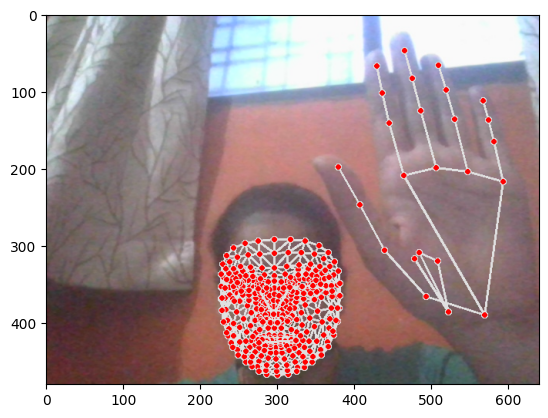

In [24]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [26]:
# mp_drawing.draw_landmarks??
# cv2.cvtColor??

### 3.Extract keypoint values

In [29]:
# results.face_landmarks
# results.left_hand_landmarks
# results.right_hand_landmarks
# results.pose_landmarks

In [31]:
results.pose_landmarks.landmark[0]

x: 0.462258577
y: 0.811067939
z: -0.96368587
visibility: 0.998555

In [33]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [35]:
len(pose)

33

In [37]:
len(results.pose_landmarks.landmark)

33

In [39]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])

In [41]:
# len(pose)
pose.shape

(33, 4)

In [43]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)

In [45]:
# len(results.face_landmarks.landmark)*3
# rh

In [47]:
lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)

In [49]:
# lh.shape
# lh

In [51]:
len(results.left_hand_landmarks.landmark)*3

63

In [53]:
rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)

In [55]:
# rh.shape
# rh

In [57]:
# len(results.right_hand_landmarks.landmark)*3

In [59]:
# np.zeros(21*3).shape

In [61]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose,face, lh, rh])

In [63]:
result_test = extract_keypoints(results)

In [65]:
result_test

array([ 0.46225858,  0.81106794, -0.96368587, ...,  0.        ,
        0.        ,  0.        ])

In [67]:
468*3 + 33*4+21*3+21*3

1662

In [69]:
np.save('0',result_test)

In [71]:
np.load('0.npy')

array([ 0.46225858,  0.81106794, -0.96368587, ...,  0.        ,
        0.        ,  0.        ])

### 4.Setup folders for collection

In [74]:
# path for expored data, numpy arrays
DATA_PATH = os.path.join('mp_Data')

# Action that we try to detect
actions = np.array(['hello','thanks','iloveyou'])

# thirty videos worth of data
no_sequences = 30

# video are going to be 30 frames in length
Sequence_length = 30

In [76]:
# hello
# 0
# 1
# 2
# 29
# thanks

# iloveyou

In [78]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os:makedirs(os.path.join(DATA_PATH, action, str(sequene)))
        except:
            pass

### 5.collect keypoint values for training and testing

In [81]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    # new loop
    # loop through action
    for action in actions:
        # loop through sequences aka videos
        for sequence in range(no_sequences):
            # loop through video length aka sequence length
            for frame_num in range(Sequence_length):
    
                # Read feed
                ret, frame = cap.read()
            
                # make detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        
                # Draw Landmarks
                draw_styled_landmarks(image, results)

                # Draw Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255), 1, cv2.LINE_AA)

                # new export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # Ensure directory exists
                # Ensure directory exists
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                
                # Save keypoints
                np.save(npy_path, keypoints)
                                    
                # show to screen
                cv2.imshow('OpenCV Feed',image)
    
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [83]:
cap.release()
cv2.destroyAllWindows()

### 6.preprocess Data and create labels and features

In [86]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [87]:
label_map = {label:num for num, label in enumerate(actions)}

In [88]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [92]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(Sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [93]:
import numpy as np

Sequence_length = 30
expected_frame_shape = (1662,)

valid_sequences = []

for i, seq in enumerate(sequences):
    if len(seq) != Sequence_length:
        print(f"Skipping sequence {i}: wrong number of frames ({len(seq)})")
        continue

    # Ensure each frame is a numpy array of correct shape
    valid = True
    for j, frame in enumerate(seq):
        if not isinstance(frame, np.ndarray):
            print(f"Skipping sequence {i}, frame {j} is not a numpy array")
            valid = False
            break
        if frame.shape != expected_frame_shape:
            print(f"Skipping sequence {i}, frame {j} has shape {frame.shape} instead of {expected_frame_shape}")
            valid = False
            break

    if valid:
        valid_sequences.append(seq)

# Convert to NumPy array
sequences_array = np.array(valid_sequences)

print("Final shape:", sequences_array.shape)  # Should be (90, 30, 1662) if all good


Skipping sequence 0, frame 0 has shape (2130,) instead of (1662,)
Skipping sequence 1, frame 0 has shape (2130,) instead of (1662,)
Skipping sequence 2, frame 1 has shape (2130,) instead of (1662,)
Skipping sequence 3, frame 0 has shape (2130,) instead of (1662,)
Skipping sequence 4, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 5, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 6, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 7, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 8, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 9, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 10, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 11, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 12, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 13, frame 0 has shape (2151,) instead of (1662,)
Skipping sequence 14, frame 0 has shape (2151,) instead of (1662,)
Skipp

In [94]:
def pad_or_fix_sequence(seq, target_length=30, frame_shape=(1662,)):
    new_seq = []

    for frame in seq:
        # Skip completely invalid frames
        if not isinstance(frame, np.ndarray):
            continue

        # Fix shape mismatch: pad or trim
        if frame.shape != frame_shape:
            frame = np.resize(frame, frame_shape)  # trims or pads with repeating values
        new_seq.append(frame)

    # Pad missing frames with zeros
    while len(new_seq) < target_length:
        new_seq.append(np.zeros(frame_shape))

    # Trim if somehow longer
    return new_seq[:target_length]

# Apply to all sequences, even broken ones
padded_sequences = [pad_or_fix_sequence(seq) for seq in sequences]

# Convert to NumPy array
sequences = np.array(padded_sequences)
print("Padded shape:", sequences.shape)


Padded shape: (90, 30, 1662)


In [98]:
sequences = np.array(padded_sequences)
sequences.shape

(90, 30, 1662)

In [100]:
np.array(labels).shape

(90,)

In [102]:
x = np.array(sequences)

In [104]:
x.shape

(90, 30, 1662)

In [106]:
y = to_categorical(labels).astype(int)

In [108]:
y
# [1, 0, 0] hello
# [0, 1, 0]thanks
# [0, 0, 1]iloveyou

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.05)

In [112]:
y_test.shape

(5, 3)

### 7.build and train LSTM Neural Network

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [117]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [119]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [121]:
[actions.shape[0]]

[3]

In [123]:
res = [.7,0.2,0.1]

In [125]:
actions[np.argmax(res)]

'hello'

### Why I used mediapipe holistic combine with LSTM
### 1.less data required
### 2.faster to train
### 3.faster detection in real-time

In [130]:
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

In [132]:
model.fit(x_train, y_train,epochs=100, callbacks=[tb_callback])

Epoch 1/100
3/3 [==============================] - 7s 111ms/step - loss: 1.1406 - categorical_accuracy: 0.3294
Epoch 2/100
3/3 [==============================] - 0s 118ms/step - loss: 1.0984 - categorical_accuracy: 0.3529
Epoch 3/100
3/3 [==============================] - 0s 119ms/step - loss: 1.0720 - categorical_accuracy: 0.2000
Epoch 4/100
3/3 [==============================] - 0s 119ms/step - loss: 1.0707 - categorical_accuracy: 0.3529
Epoch 5/100
3/3 [==============================] - 0s 129ms/step - loss: 1.0793 - categorical_accuracy: 0.5294
Epoch 6/100
3/3 [==============================] - 0s 102ms/step - loss: 1.0860 - categorical_accuracy: 0.5529
Epoch 7/100
3/3 [==============================] - 0s 101ms/step - loss: 1.0891 - categorical_accuracy: 0.4118
Epoch 8/100
3/3 [==============================] - 0s 117ms/step - loss: 1.0933 - categorical_accuracy: 0.4353
Epoch 9/100
3/3 [==============================] - 0s 135ms/step - loss: 1.0970 - categorical_accuracy: 0.3294
E

In [134]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

### 8.Make Predictions

In [145]:
res = model.predict(x_test)

1/1 [==============================] - 0s 40ms/step


In [157]:
actions[np.argmax(res[0])]

'thanks'

In [165]:
actions[np.argmax(y_test[0])]

'hello'

### 9.Save wights

In [168]:
model.save('action.h5')

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [170]:
model.load_weights('action.h5')

### 10.evalution using onfusion metrix and accuracy

In [173]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [175]:
yhat = model.predict(x_train)

3/3 [==============================] - 0s 50ms/step


In [177]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [179]:
# yhat

In [181]:
# ytrue

In [183]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[58,  0],
        [26,  1]],

       [[ 1, 54],
        [ 0, 30]],

       [[57,  0],
        [28,  0]]], dtype=int64)

In [185]:
accuracy_score(ytrue,yhat)

0.36470588235294116

### 11.Test in Real Time

In [233]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    res = res.flatten()  # Ensure 1D
    num_classes = min(len(res), len(actions), len(colors))  # Safety

    for num in range(num_classes):
        prob = res[num]
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame


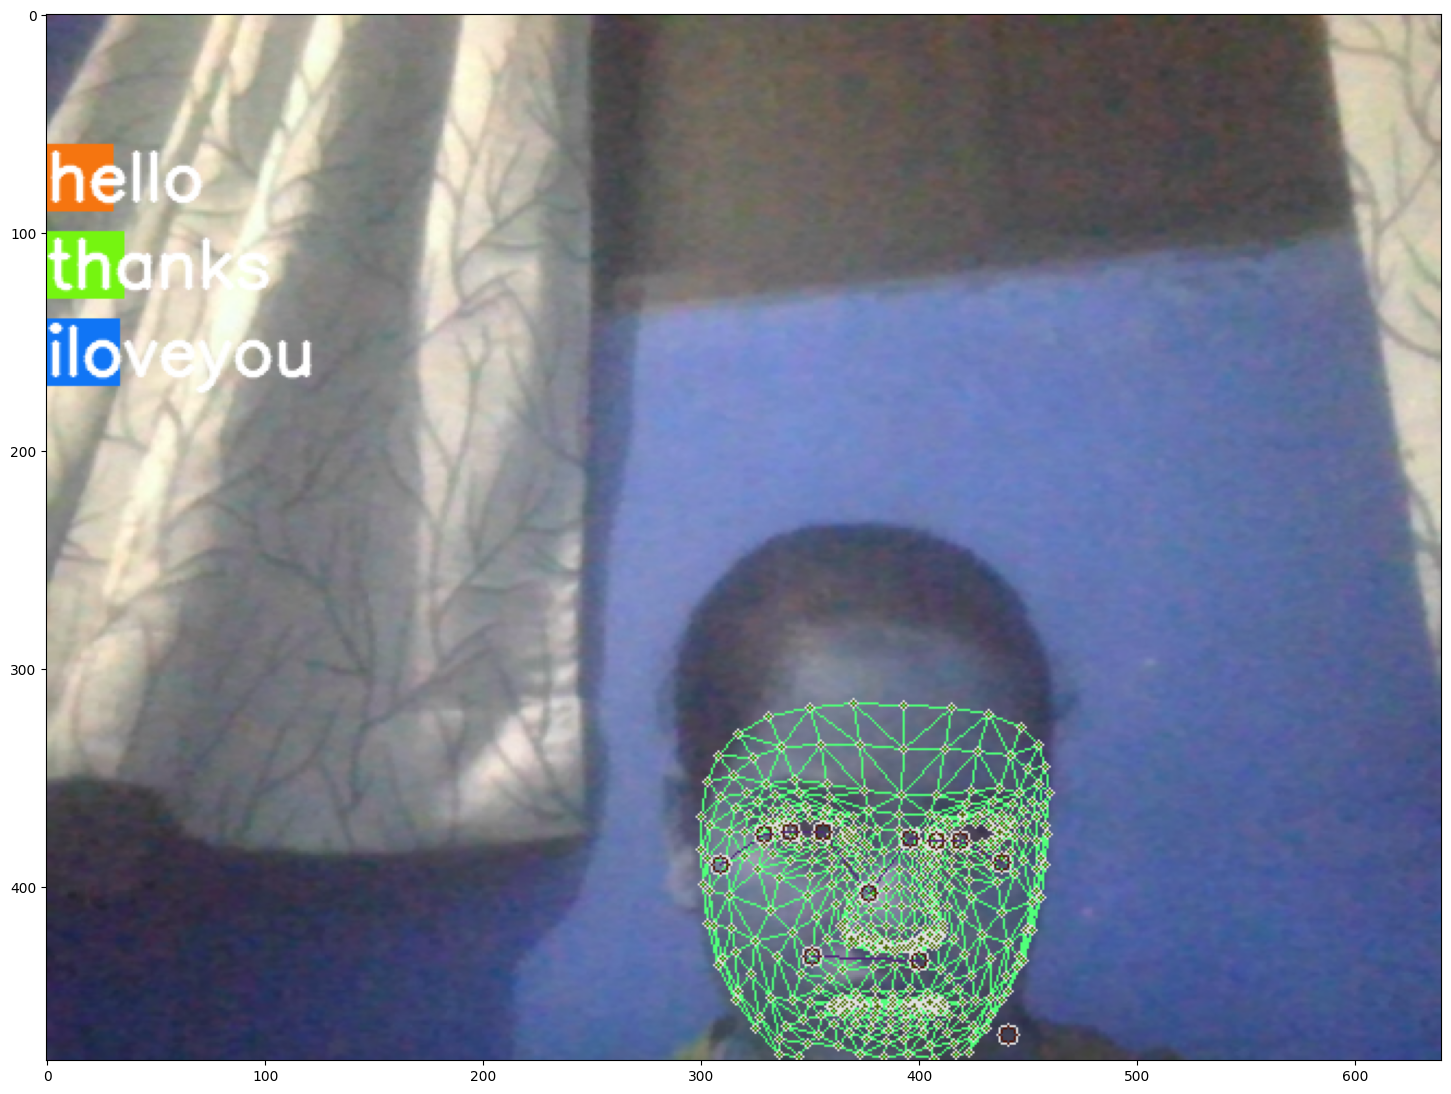

In [235]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret:
            break

        # Make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            res = res.flatten()  # Ensure 1D
            print(actions[np.argmax(res)])

            # 3. Viz logic
            if np.max(res) > threshold:
                predicted_action = actions[np.argmax(res)]
                if len(sentence) == 0 or predicted_action != sentence[-1]:
                    sentence.append(predicted_action)

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualize probabilities
            image = prob_viz(res, actions, image, colors)

        # Display prediction text
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [190]:
cap.release()
cv2.destroyAllWindows()

In [210]:
res[np.argmax(res)] > threshold

array([False, False, False])

In [198]:
x_test[0].shape

(30, 1662)

In [200]:
np.expand_dims(x_test[0],axis=0)

array([[[ 0.57804179,  0.64886343, -1.25131369, ...,  0.        ,
          0.60791212,  0.57277936],
        [ 0.57805097,  0.6496104 , -1.39105177, ...,  0.        ,
          0.60830081,  0.57374203],
        [ 0.57865447,  0.64963418, -1.4344101 , ...,  0.        ,
          0.60541546,  0.57351649],
        ...,
        [ 0.58464164,  0.65232241, -1.38403583, ...,  0.        ,
          0.60790342,  0.57967758],
        [ 0.58273792,  0.65240419, -1.35577011, ...,  0.        ,
          0.60972029,  0.57804227],
        [ 0.58350027,  0.65219748, -1.35523152, ...,  0.        ,
          0.60824639,  0.57961166]]])

In [208]:
num_sequences = 90  # or whatever number you intend
shape = (num_sequences, 30, 1662)

In [206]:
model.predict(np.expand_dims(x_test[0],axis=0))

1/1 [==============================] - 0s 88ms/step


array([[0.3074347 , 0.3591724 , 0.33339292]], dtype=float32)